In [79]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Tfont = {'fontname':'TH Sarabun New', 'size':16}
Tfont2 = {'fontname':'TH Sarabun New', 'size':30}
Nfont = {'fontname':'Tahoma', 'size':5}
np.set_printoptions(precision=3, suppress=True)

In [49]:
df = pd.read_excel('data1.xlsx')
df_Header = np.array(df.columns)
df_corr = df.corr()
df_arr = np.array(df_corr)

In [46]:
df_corr

,fre,amp
fre,1.000000,0.152097
amp,0.152097,1.000000


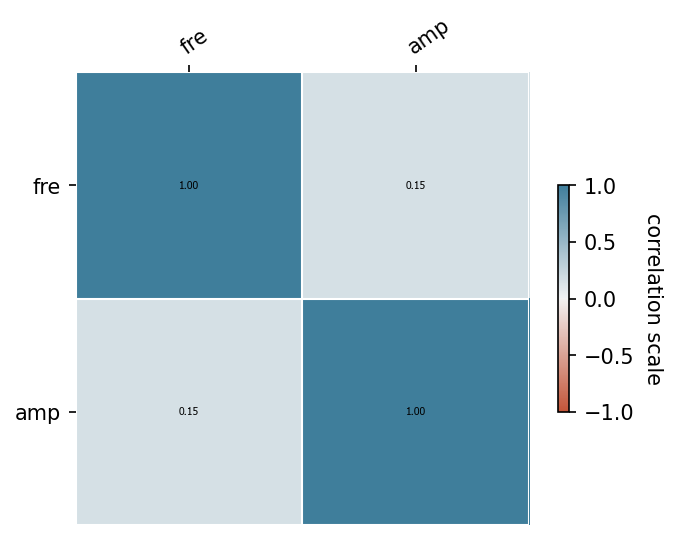

In [82]:
fig = plt.figure(dpi=150, figsize=(5, 4))
ax = plt.gca()
im = ax.imshow(df_arr, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 230, as_cmap=True)) # 20 = red, 230 = blue
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.5)
cbar.ax.set_ylabel('correlation scale', rotation=-90, va='bottom')
ax.set_xticks(np.arange(df_arr.shape[1]))
ax.set_yticks(np.arange(df_arr.shape[0]))
ax.set_xticklabels(df_Header)
ax.set_yticklabels(df_Header)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(ax.get_xticklabels(), rotation=35, ha="left", rotation_mode='anchor')

ax.spines[:].set_visible(False)
ax.set_xticks(np.arange(df_arr.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(df_arr.shape[1]+1)-.5, minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
ax.tick_params(which='minor', bottom=False, left=False)

kw = dict(horizontalalignment='center', verticalalignment='center')
textcolor=['black', 'white']
threshold=0
valfmt='{x:.2f}'
valfmt=matplotlib.ticker.StrMethodFormatter(valfmt)
for i in range(df_arr.shape[0]):
    for j in range(df_arr.shape[1]):
        kw.update(color=textcolor[int(df_arr[i, j]<threshold)])
        im.axes.text(j, i, valfmt(df_arr[i, j], None), **kw, **Nfont)

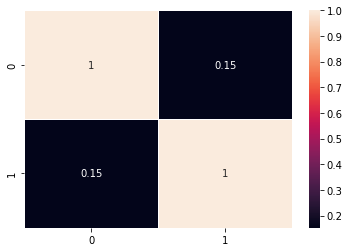

In [55]:
ax = sns.heatmap(df_arr, annot=True, linewidths=.5)